In [1]:
import os
import copy
import time
import asyncio
import warnings
import logging

from pathlib import Path

import numpy as np
from astropy.io import fits

from scipy import ndimage
from scipy.signal import medfilt
from scipy.ndimage.filters import gaussian_filter
from astropy.modeling import models, fitting


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 6]

#Import CWFS package
from lsst import cwfs
from lsst.cwfs.instrument import Instrument
from lsst.cwfs.algorithm import Algorithm
from lsst.cwfs.image import Image, readFile, aperture2image, showProjection
import lsst.cwfs.plots as plots

%matplotlib inline

In [2]:
import wget

In [3]:
from lsst.ts import salobj
# from lsst.ts.standardscripts.auxtel.attcs import ATTCS
import asyncio

In [4]:
cam = salobj.Remote(salobj.Domain(), "GenericCamera", 1)

In [5]:
await cam.start_task

Waiting intra image
1579914693-HD32309_intra-0-1
1579914737-HD32309_extra-0-1
1579914693-HD32309_intra-0-1.fits
1579914737-HD32309_extra-0-1.fits
2 3
Creating stamps of centroid [y,x] = [330,532] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


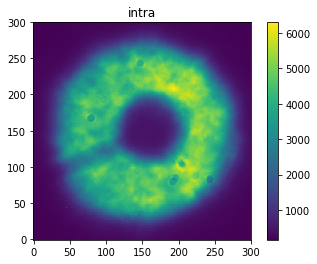

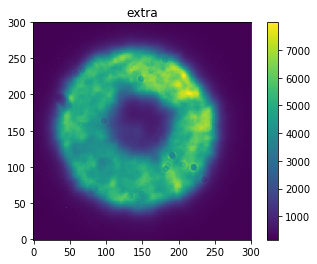

Extra-focal filename: 1579914737-HD32309_extra-0-1.fits
Intra-focal filename: 1579914693-HD32309_intra-0-1.fits
[-179.04853218  -90.89808316    7.62577016   34.94252358   95.24708368
  -30.52622954  -25.03495367  -28.05990152   -9.13521877  -10.92486286
   12.84152698   21.99360103   -0.93681009    3.71042855  -11.67974259
   11.61400652   10.90794974  -21.36557551   -4.31951373]


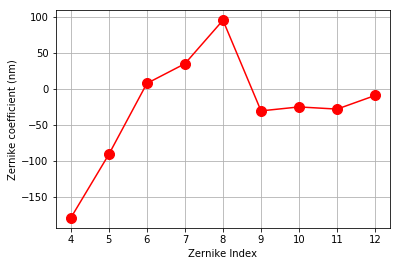

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 77 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 72 messages


1579914974-HD32309_intra-0-1
1579915018-HD32309_extra-0-1
1579914974-HD32309_intra-0-1.fits
1579915018-HD32309_extra-0-1.fits
1 0
Creating stamps of centroid [y,x] = [475,553] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


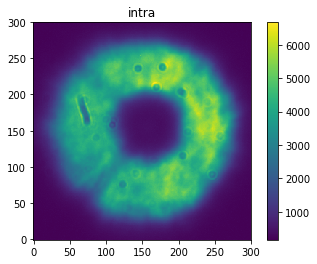

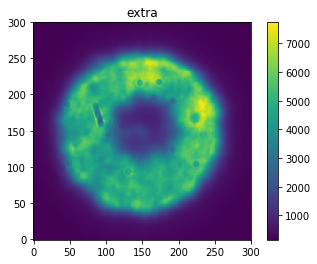

Extra-focal filename: 1579915018-HD32309_extra-0-1.fits
Intra-focal filename: 1579914974-HD32309_intra-0-1.fits
[-2.37729755e+02  7.48346491e+01 -8.60836351e+00  3.28133557e+01
  1.05307908e+02 -9.81978109e+01  2.60940337e+01 -6.08587203e+00
 -1.87920737e+00 -2.94842570e+00 -2.04039265e+01 -4.18647283e+00
 -2.98959460e+00  1.18336121e+01 -1.49128819e-01  8.59101394e-01
 -1.36661289e+01 -1.45310473e+01 -8.69295839e+00]


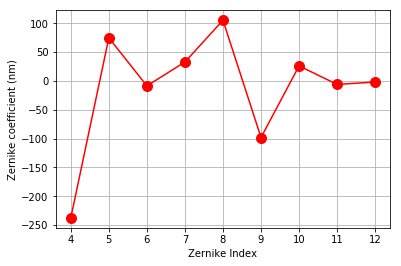

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 79 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 73 messages


Waiting intra image
1579916016-HD32309_intra-0-1
1579916060-HD32309_extra-0-1
1579916016-HD32309_intra-0-1.fits
1579916060-HD32309_extra-0-1.fits
1 1
Creating stamps of centroid [y,x] = [358,436] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


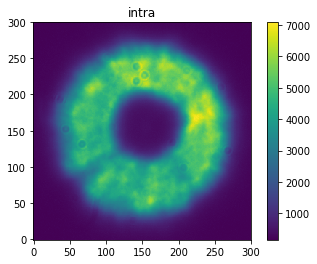

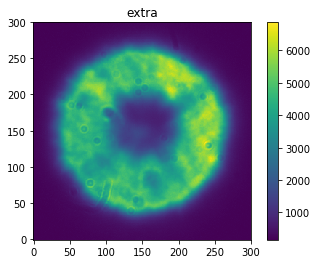

Extra-focal filename: 1579916060-HD32309_extra-0-1.fits
Intra-focal filename: 1579916016-HD32309_intra-0-1.fits
[-4.51012159e-02 -1.77004608e+01  8.30999671e+01  4.61287836e+01
  8.91854322e+01 -3.22555051e+01 -1.10014032e+01  2.39088608e+00
 -5.18723295e+00  2.11241289e+00 -1.07406981e+01 -6.85424458e+00
 -3.44467841e+00  6.03982672e+00  6.79326459e+00  1.44966631e+00
 -2.30965798e-01 -8.31832593e+00 -9.75280892e+00]


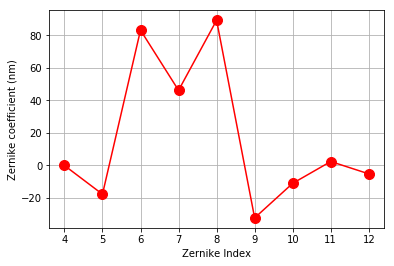

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 81 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 74 messages


1579916251-HD32309_intra-0-1
1579916296-HD32309_extra-0-1
1579916251-HD32309_intra-0-1.fits
1579916296-HD32309_extra-0-1.fits
0 1
Creating stamps of centroid [y,x] = [459,494] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


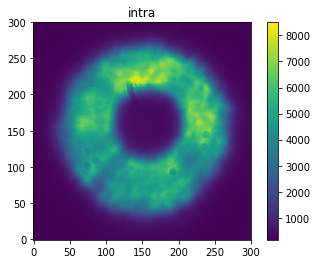

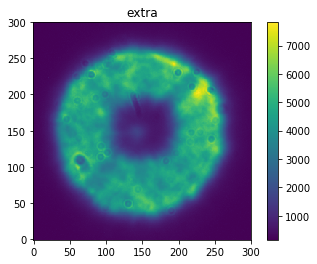

Extra-focal filename: 1579916296-HD32309_extra-0-1.fits
Intra-focal filename: 1579916251-HD32309_intra-0-1.fits
[ 9.21715141e+01  2.00370443e+01  8.74713196e+01  4.60888091e+01
  3.39041014e+01 -9.06871920e+01  4.65026976e+00 -4.05897753e-02
 -1.08328184e+01 -7.41039655e+00 -4.78023299e+01 -1.21437341e+01
  8.99301109e+00  1.52836054e+01 -9.72384670e-01  1.24099070e+01
 -2.21713351e+01 -3.61835141e+00 -1.49866738e+01]


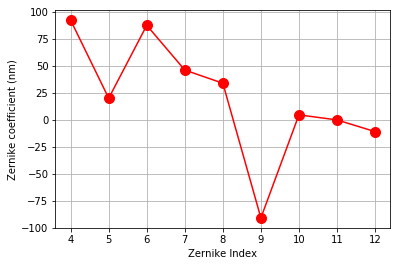

Waiting intra image


RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 75 messages


1579916527-HD32309_intra-0-1
1579916571-HD32309_extra-0-1
1579916527-HD32309_intra-0-1.fits
1579916571-HD32309_extra-0-1.fits
2 -3
Creating stamps of centroid [y,x] = [510,575] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


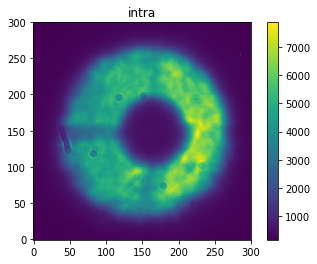

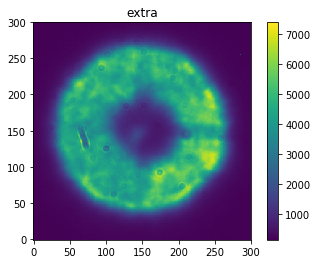

Extra-focal filename: 1579916571-HD32309_extra-0-1.fits
Intra-focal filename: 1579916527-HD32309_intra-0-1.fits
[ 123.03951031 -101.70848152  151.73266931  -12.74636439  107.06470345
   34.78166098  -43.34695678   -6.04954065   -3.05570051   16.79851151
   22.45368844  -16.81535333    5.47065301    5.42333188    8.407025
   -2.05443909  -13.63802957   -4.69283479  -12.05437295]


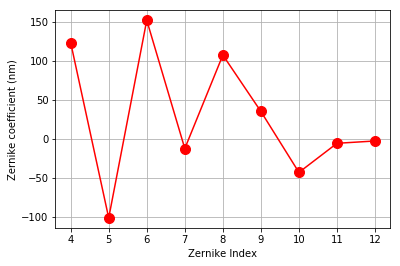

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 83 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 77 messages


1579917237-HD32309_intra-0-1
1579917281-HD32309_extra-0-1
1579917237-HD32309_intra-0-1.fits
1579917281-HD32309_extra-0-1.fits
0 3
Creating stamps of centroid [y,x] = [431,446] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


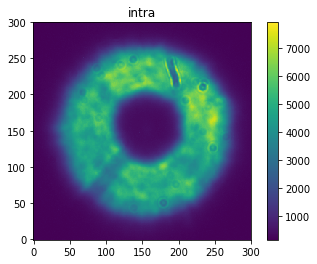

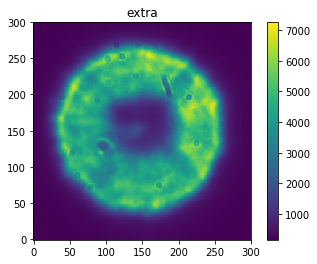

Extra-focal filename: 1579917281-HD32309_extra-0-1.fits
Intra-focal filename: 1579917237-HD32309_intra-0-1.fits
[ 42.40661264 -52.45049256  -2.64934917  17.06782011  61.20653302
 -62.22580423  18.48864816  -2.0397876   -1.16870263  -0.36360222
 -14.40334714 -17.57949458  -0.34449301  17.29601102   5.57584944
  10.43626074  17.69627736  -7.11024666 -13.14029368]


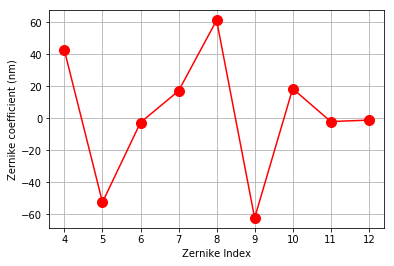

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 11 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 80 messages


Waiting intra image
1579917372-HD32309_intra-0-1
1579917416-HD32309_extra-0-1
1579917372-HD32309_intra-0-1.fits
1579917416-HD32309_extra-0-1.fits
2 -1
Creating stamps of centroid [y,x] = [528,522] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


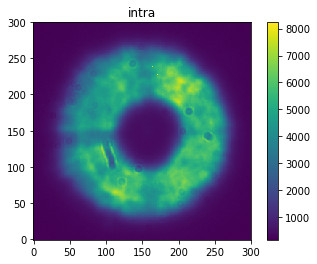

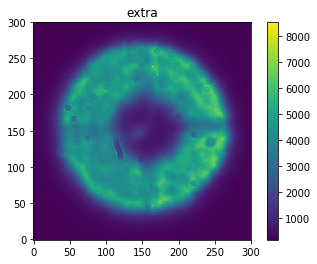

Extra-focal filename: 1579917416-HD32309_extra-0-1.fits
Intra-focal filename: 1579917372-HD32309_intra-0-1.fits
[112.51506414 -80.92267032  85.40916784  15.77044116  58.74452708
  18.60786164 -54.84097765  -5.00899602  -5.01525255  20.59579012
  23.05262943  -3.13248728  14.09861332  -9.61006648  -3.23210202
  -0.12958597  -6.07168561  17.73550418 -12.54267626]


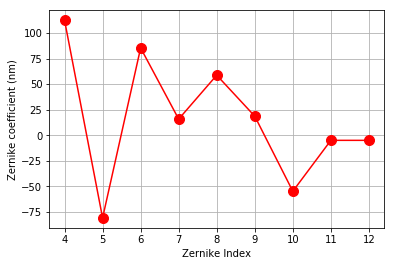

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 16 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 68 messages


1579917536-HD32309_intra-0-1
1579917580-HD32309_extra-0-1
1579917536-HD32309_intra-0-1.fits


HTTPError: HTTP Error 404: File not found

In [6]:
for i in range(10):
    print("================================================================================")
    print("Waiting intra image")
    cam.evt_endReadout.flush()
    intra_endron = await cam.evt_endReadout.next(flush=False)
    if "intra" not in intra_endron.imageName:
        print(f"Got {intra_endron.imageName}. Not an intra image... skipping")
        continue
    print(intra_endron.imageName)

    extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(extra_endron.imageName)

    intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
    extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
    intra_fname = wget.download(intra_wget_url)
    print(f"============")
    print(f'{intra_fname}')
    extra_fname = wget.download(extra_wget_url)
    print(f'{extra_fname}')
    print(f"============")

    # Open fits files, note you can start here if your files exist already

    #intra_fname='I1_intra_20190908.fits'
    intra_exp=(fits.open(intra_fname))[0].data

    #extra_fname='I2_extra_20190908.fits'
    extra_exp=(fits.open(extra_fname))[0].data

    # Show images added together to estimate centroid
    plt.imshow(intra_exp+extra_exp)

    # Define the image it will use to perform final center
    im_shape=intra_exp.shape
    side=300
    # Set to False to declare centroid manually!
    if True:
        im= (intra_exp+extra_exp)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
    #     im_filtered[im_filtered < mean] = 0.
    #     im_filtered[im_filtered > mean] = 1.
        # iter 1
        ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        # iter 2
        intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
        extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
        im= (intra_square+extra_square)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
        im_filtered[im_filtered < mean] = 0.
        im_filtered[im_filtered > mean] = 1.
        # iter 1
        cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        print(cy2-side, cx2-side)    
        ceny += (cy2-side)
        cenx += (cx2-side)
    else:
        # Manually declare where the center is
        ceny=350 #round(im_shape[0]/2)
        cenx=450 # round(im_shape[1]/2)
    side=150 # side length of image
    print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
    im_shape=intra_exp.shape
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

    #Create object for CWFS code
    # Select where your object is, but ours will be on-axis
    fieldXY = [0.0,0.0]

    # I1/I2 get modified down below, so reset here
    I1 = None; I2=None
    I1 = Image(intra_square, fieldXY, Image.INTRA)
    I2 = Image(extra_square, fieldXY, Image.EXTRA)

    # Declare instrument
    inst=Instrument('auxtel',I1.sizeinPix) # example
    hex_to_focus_scale = 41.0
    offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
    pixelsize = 3.6e-6*4 # 4 is the binning
    # FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

    print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
    print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
    print('pixelSize should be: {}'.format(pixelsize))

    #declare algorithm
    # declare algorithm - exponential solver.
    algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


    # Plot images
    plots.plotImage(I1.image,'intra') 
    #plots.plotImage(I_focus.image,'focus')
    plots.plotImage(I2.image,'extra')
    print('Extra-focal filename: {}'.format(extra_fname))
    print('Intra-focal filename: {}'.format(intra_fname))

    algo.runIt(inst,I1,I2,'onAxis')
    print(algo.zer4UpNm)
    plots.plotZer(algo.zer4UpNm[0:9],'nm')

1579917536-HD32309_intra-0-1 (1).fits
1579917580-HD32309_extra-0-1.fits
3 -1
Creating stamps of centroid [y,x] = [540,645] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


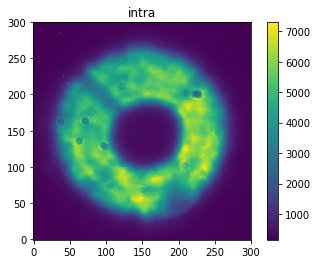

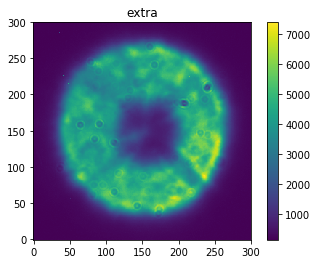

Extra-focal filename: 1579917580-HD32309_extra-0-1.fits
Intra-focal filename: 1579917536-HD32309_intra-0-1 (1).fits
[ 113.87140371  -28.21531688 -181.91501551  -18.80399776   41.2096137
   11.91858945   36.40070922    7.06705724    6.53867337   17.23781175
  -34.41934735   18.48291103   12.59315252  -12.49928454    2.48022386
  -12.51841214    6.01723705   17.59366411  -14.95526293]


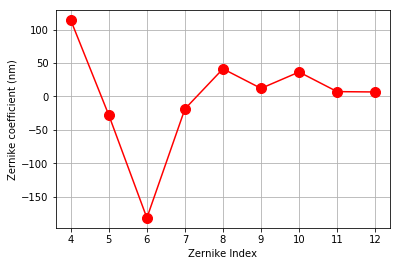

RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


In [9]:

# cam.evt_endReadout.flush()

# intra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
# print(intra_endron.imageName)

# extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
# print(extra_endron.imageName)

intra_name = '1579917536-HD32309_intra-0-1'
extra_name = '1579917580-HD32309_extra-0-1'

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

Waiting intra image
1579918126-HD32309_intra-0-1
1579918166-HD32309_extra-0-1
1579918126-HD32309_intra-0-1.fits
1579918166-HD32309_extra-0-1.fits
-1 -2
Creating stamps of centroid [y,x] = [467,581] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


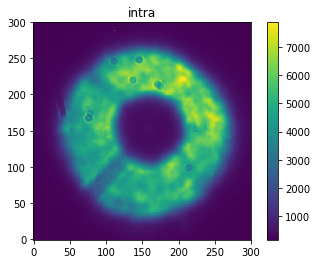

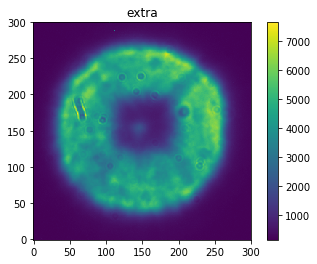

Extra-focal filename: 1579918166-HD32309_extra-0-1.fits
Intra-focal filename: 1579918126-HD32309_intra-0-1.fits
[124.57162978  67.54649056  90.77409184  76.37100845  67.40974398
 -73.94518624 -14.42975531   1.31816803  -9.61449931   4.01704403
 -50.47383433   0.21345436   7.77480692   5.08146681  -9.37646143
  12.31260802  -8.30221648 -11.01344192 -14.32900332]


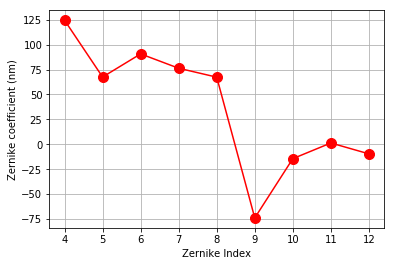

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 86 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 80 messages


1579918785-HD32309_intra-0-1
1579918823-HD32309_extra-0-1
1579918785-HD32309_intra-0-1.fits
1579918823-HD32309_extra-0-1.fits
4 5
Creating stamps of centroid [y,x] = [439,540] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :20.5 [mm] at the focus
pixelSize should be: 1.44e-05


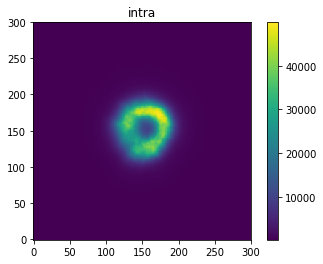

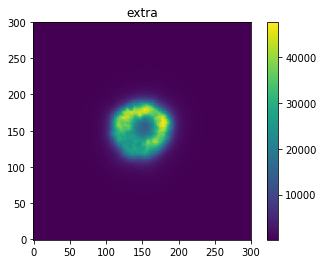

Extra-focal filename: 1579918823-HD32309_extra-0-1.fits
Intra-focal filename: 1579918785-HD32309_intra-0-1.fits
[ 27.68950789  21.38927339 115.97863069  59.44517535  22.84355294
 -86.59566575   1.40775881   1.72367305 -10.77334953   8.14205644
  -0.1215466   -1.44047211   0.58697639  -8.74911022  -4.14239833
   7.41350406  -1.52773993  -9.93802423  -1.55346642]


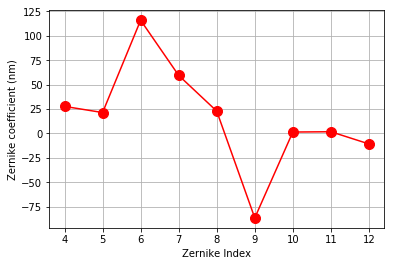

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 82 messages


Waiting intra image


RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


CancelledError: 

In [10]:
for i in range(10):
    print("================================================================================")
    print("Waiting intra image")
    cam.evt_endReadout.flush()
    intra_endron = await cam.evt_endReadout.next(flush=False)
    if "intra" not in intra_endron.imageName:
        print(f"Got {intra_endron.imageName}. Not an intra image... skipping")
        continue
    print(intra_endron.imageName)

    extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
    print(extra_endron.imageName)

    intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
    extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
    intra_fname = wget.download(intra_wget_url)
    print(f"============")
    print(f'{intra_fname}')
    extra_fname = wget.download(extra_wget_url)
    print(f'{extra_fname}')
    print(f"============")

    # Open fits files, note you can start here if your files exist already

    #intra_fname='I1_intra_20190908.fits'
    intra_exp=(fits.open(intra_fname))[0].data

    #extra_fname='I2_extra_20190908.fits'
    extra_exp=(fits.open(extra_fname))[0].data

    # Show images added together to estimate centroid
    plt.imshow(intra_exp+extra_exp)

    # Define the image it will use to perform final center
    im_shape=intra_exp.shape
    side=300
    # Set to False to declare centroid manually!
    if True:
        im= (intra_exp+extra_exp)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
    #     im_filtered[im_filtered < mean] = 0.
    #     im_filtered[im_filtered > mean] = 1.
        # iter 1
        ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        # iter 2
        intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
        extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
        im= (intra_square+extra_square)
        im_filtered = medfilt(im,[5,5])
        im_filtered -= int(np.median(im_filtered))
        mean = np.mean(im_filtered)
        im_filtered[im_filtered < mean] = 0.
        im_filtered[im_filtered > mean] = 1.
        # iter 1
        cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
        print(cy2-side, cx2-side)    
        ceny += (cy2-side)
        cenx += (cx2-side)
    else:
        # Manually declare where the center is
        ceny=350 #round(im_shape[0]/2)
        cenx=450 # round(im_shape[1]/2)
    side=150 # side length of image
    print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
    im_shape=intra_exp.shape
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

    #Create object for CWFS code
    # Select where your object is, but ours will be on-axis
    fieldXY = [0.0,0.0]

    # I1/I2 get modified down below, so reset here
    I1 = None; I2=None
    I1 = Image(intra_square, fieldXY, Image.INTRA)
    I2 = Image(extra_square, fieldXY, Image.EXTRA)

    # Declare instrument
    inst=Instrument('auxtel',I1.sizeinPix) # example
    hex_to_focus_scale = 41.0
    offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
    pixelsize = 3.6e-6*4 # 4 is the binning
    # FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

    print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
    print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
    print('pixelSize should be: {}'.format(pixelsize))

    #declare algorithm
    # declare algorithm - exponential solver.
    algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


    # Plot images
    plots.plotImage(I1.image,'intra') 
    #plots.plotImage(I_focus.image,'focus')
    plots.plotImage(I2.image,'extra')
    print('Extra-focal filename: {}'.format(extra_fname))
    print('Intra-focal filename: {}'.format(intra_fname))

    algo.runIt(inst,I1,I2,'onAxis')
    print(algo.zer4UpNm)
    plots.plotZer(algo.zer4UpNm[0:9],'nm')

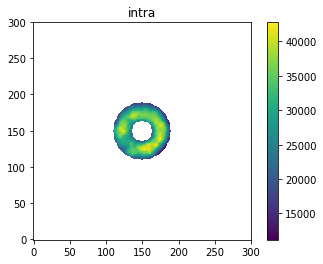

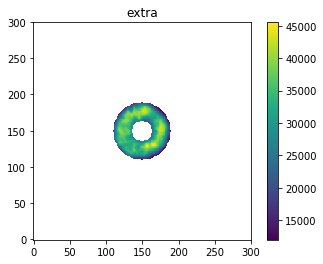

In [12]:
plots.plotImage(I1.image,'intra', mask=algo.pMask) 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra', mask=algo.pMask)

In [13]:
aa = [ 27.68950789,  21.38927339, 115.97863069,  59.44517535,  22.84355294,
 -86.59566575,   1.40775881,   1.72367305, -10.77334953,   8.14205644,
  -0.1215466,   -1.44047211,   0.58697639,  -8.74911022,  -4.14239833,
   7.41350406,  -1.52773993,  -9.93802423,  -1.55346642]

bb= [124.57162978,  67.54649056,  90.77409184,  76.37100845,  67.40974398,
 -73.94518624, -14.42975531,   1.31816803,  -9.61449931,   4.01704403,
 -50.47383433,   0.21345436,   7.77480692,   5.08146681,  -9.37646143,
  12.31260802,  -8.30221648, -11.01344192, -14.32900332]   


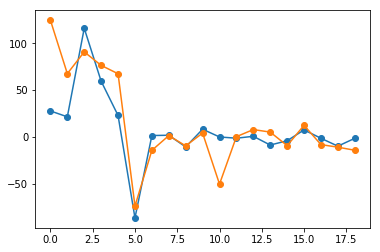

In [17]:
plt.plot(aa, 'o-')
plt.plot(bb, 'o-')

Waiting intra image
1579919548-HD32309_intra-0-1
1579919586-HD32309_extra-0-1
1579919548-HD32309_intra-0-1.fits
1579919586-HD32309_extra-0-1.fits
4 8
Creating stamps of centroid [y,x] = [436,516] with a side length of 50 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :20.5 [mm] at the focus
pixelSize should be: 1.44e-05


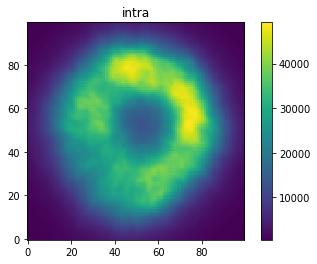

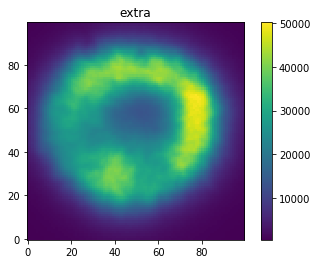

Extra-focal filename: 1579919586-HD32309_extra-0-1.fits
Intra-focal filename: 1579919548-HD32309_intra-0-1.fits
[ 41.15338755  30.7219094  149.7993586   31.49409924  39.83728423
 -54.31684721 -23.13416316 -10.24287034  -0.82529031  -4.1360234
 -26.45343732  -9.44035257  -1.51522722  -1.79541351   8.38671162
   3.92794674  12.60308601   3.14031031   0.41493472]


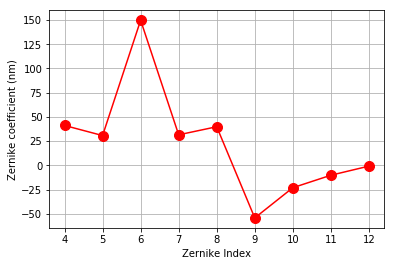

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 15 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 12 messages


In [19]:
print("================================================================================")
print("Waiting intra image")
cam.evt_endReadout.flush()
intra_endron = await cam.evt_endReadout.next(flush=False)
if "intra" not in intra_endron.imageName:
    raise RuntimeError(f"Got {intra_endron.imageName}. Not an intra image... skipping")
    
#     continue
print(intra_endron.imageName)

extra_endron = await cam.evt_endReadout.next(flush=False, timeout=120)
print(extra_endron.imageName)

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_endron.imageName+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_endron.imageName+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=50 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

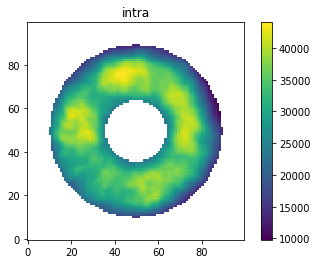

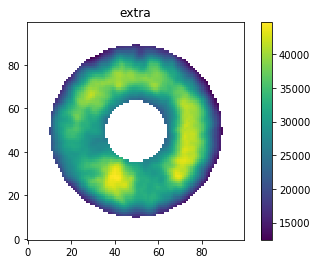

In [20]:
plots.plotImage(I1.image,'intra', mask=algo.pMask) 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra', mask=algo.pMask)

4 8
Creating stamps of centroid [y,x] = [436,516] with a side length of 64 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :20.5 [mm] at the focus
pixelSize should be: 1.44e-05


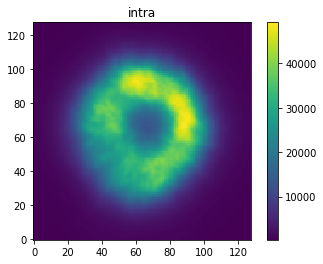

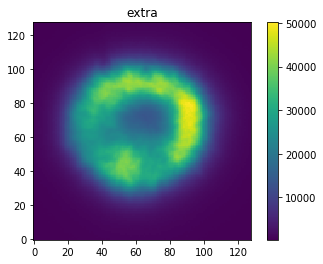

Extra-focal filename: 1579919586-HD32309_extra-0-1.fits
Intra-focal filename: 1579919548-HD32309_intra-0-1.fits
[ 41.12968746  30.80141684 149.81659894  31.53164318  39.8417671
 -54.25119712 -23.22431918 -10.23670522  -0.8288314   -4.12922435
 -26.43536475  -9.47394493  -1.51699173  -1.75498525   8.38083574
   3.93629969  12.6062874    3.09274615   0.41205831]


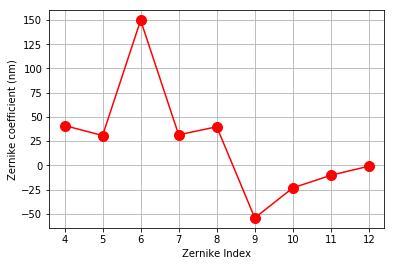

RemoteEvent(GenericCamera, 1, logMessage) falling behind; read 18 messages
RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 16 messages


In [21]:
#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=64 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [ ]:
[ 41.15338755  30.7219094  149.7993586   31.49409924  39.83728423
 -54.31684721 -23.13416316 -10.24287034  -0.82529031  -4.1360234
 -26.45343732  -9.44035257  -1.51522722  -1.79541351   8.38671162
   3.92794674  12.60308601   3.14031031   0.41493472]

In [29]:
0.0205/0.5

0.041

In [30]:
0.5*0.041

0.0205

In [23]:
inst.offset

0.0205

# Defocus of 0.5

In [31]:
dz = 0.5

1579919938-HD32309_intra-0-1.fits
1579919976-HD32309_extra-0-1.fits
4 6
Creating stamps of centroid [y,x] = [430,497] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :20.5 [mm] at the focus
pixelSize should be: 1.44e-05


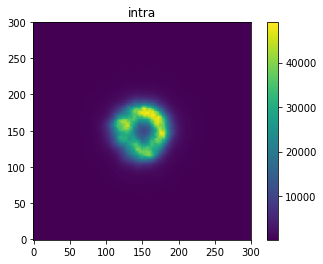

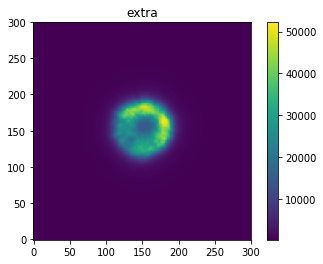

Extra-focal filename: 1579919976-HD32309_extra-0-1.fits
Intra-focal filename: 1579919938-HD32309_intra-0-1.fits
[ 40.78070215   7.25278911  45.0996916   65.3413766   51.05323946
 -53.03877111  15.2832055   -3.95832385   4.45234438  13.76096592
 -22.39936359  -2.31930261  -3.72839159 -12.17610747   1.00120102
   3.50466682  -1.91955921   1.58428581  -0.84754886]


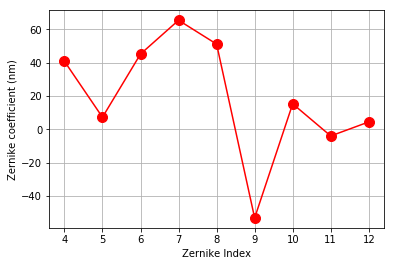

In [32]:
intra_name = '1579919938-HD32309_intra-0-1'
extra_name = "1579919976-HD32309_extra-0-1"

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
inst.offset = dz*0.041
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

# Defocus of 0.75

In [33]:
dz = 0.75

RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 76 messages


1579920116-HD32309_intra-0-1.fits
1579920156-HD32309_extra-0-1.fits
0 1
Creating stamps of centroid [y,x] = [430,488] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :30.75 [mm] at the focus
pixelSize should be: 1.44e-05


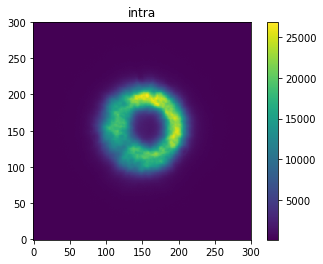

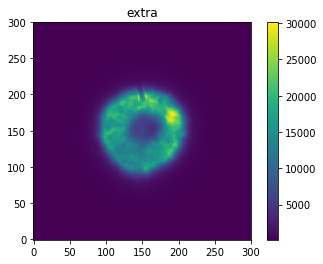

Extra-focal filename: 1579920156-HD32309_extra-0-1.fits
Intra-focal filename: 1579920116-HD32309_intra-0-1.fits
[-192.64459562  113.90585086   99.99370646   24.90497436 -191.20863657
   16.75046594   92.18636698   43.07426085   -8.53125123    3.50407281
  -46.59510777   23.37499268   45.59104899    5.83610644  -10.73915737
   -2.47625798   12.8545851    -1.00425848   -5.22131902]


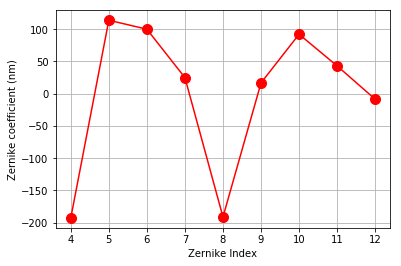

In [34]:
intra_name = "1579920116-HD32309_intra-0-1"
extra_name = "1579920156-HD32309_extra-0-1"

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
inst.offset = dz*0.041
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

# Defocus 1.0

In [35]:
dz = 1.

1579920264-HD32309_intra-0-1.fits
1579920305-HD32309_extra-0-1.fits
1 1
Creating stamps of centroid [y,x] = [433,484] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :41.0 [mm] at the focus
pixelSize should be: 1.44e-05


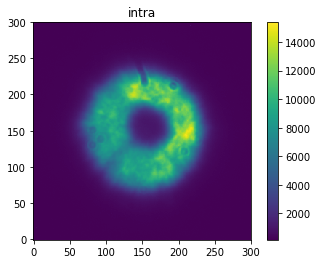

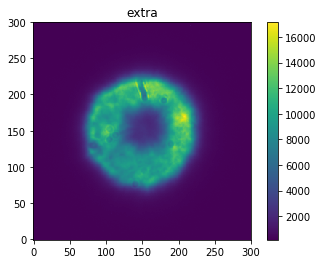

Extra-focal filename: 1579920305-HD32309_extra-0-1.fits
Intra-focal filename: 1579920264-HD32309_intra-0-1.fits
[-1.44989259e+02 -2.75758219e+01  6.08713829e+01 -2.54485169e+02
 -3.52662409e+02  5.54648906e+00  1.53914863e+02  3.48163138e+01
  4.91007364e+00  2.95533734e+00  6.44096110e+01  3.10145476e+01
  5.51288308e+01  3.87946709e+01 -1.43413178e+01 -3.50191743e-01
  5.06895763e+00 -2.92751859e+01 -3.99723924e+00]


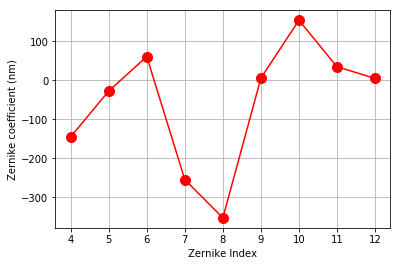

In [36]:
intra_name = "1579920264-HD32309_intra-0-1"
extra_name = "1579920305-HD32309_extra-0-1"

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
inst.offset = dz*0.041
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

# Defocus 1.5

In [37]:
dz = 1.5

1579920024-HD32309_intra-0-1.fits
1579920068-HD32309_extra-0-1.fits
-2 1
Creating stamps of centroid [y,x] = [430,494] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :61.5 [mm] at the focus
pixelSize should be: 1.44e-05


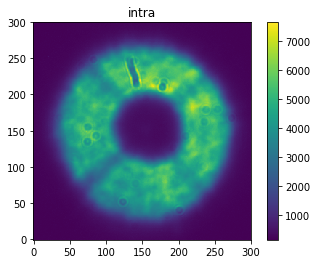

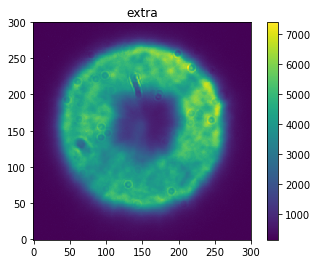

Extra-focal filename: 1579920068-HD32309_extra-0-1.fits
Intra-focal filename: 1579920024-HD32309_intra-0-1.fits

[-112.70903439 -888.10546433 -438.89183139 -284.77702027 -413.15417396
 -341.77945474  241.63107796   80.41775448   50.44838214   82.54686464
  -20.12340267  -37.27710623   -9.68351641   -7.13984562  -21.38737314
   28.44399634   -3.3953659   -10.67581535  -21.45354137]


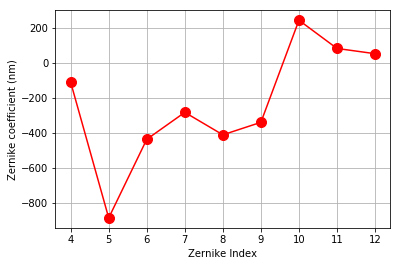

In [38]:
intra_name = "1579920024-HD32309_intra-0-1"
extra_name = "1579920068-HD32309_extra-0-1"

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
inst.offset = dz*0.041
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

In [52]:
a = [ 40.78070215,   7.25278911,  45.0996916,   65.3413766,   51.05323946,
 -53.03877111,  15.2832055,   -3.95832385,   4.45234438,  13.76096592,
 -22.39936359,  -2.31930261,  -3.72839159, -12.17610747,   1.00120102,
   3.50466682,  -1.91955921,   1.58428581,  -0.84754886,]

a2 = [-26.09931372  , 7.51513938 , 69.29715261 , 77.2199227  , 60.96995977
 , -7.67350846 , -4.41653857 , 11.67656204 , -4.44413495  , 2.73507137
 , -4.34069356, -15.05293112 , -4.67137253, -11.66085189 , -0.93312262
 , -3.42565199  , 9.91607173  , 8.65657057 , -1.73247076]

b = [-192.64459562,  113.90585086,   99.99370646,   24.90497436, -191.20863657,
   16.75046594,   92.18636698,   43.07426085,   -8.53125123,    3.50407281,
  -46.59510777,   23.37499268,   45.59104899,    5.83610644,  -10.73915737,
   -2.47625798,   12.8545851,    -1.00425848,   -5.22131902,]


c = [-1.44989259e+02, -2.75758219e+01 , 6.08713829e+01, -2.54485169e+02
, -3.52662409e+02 , 5.54648906e+00 , 1.53914863e+02 , 3.48163138e+01
 , 4.91007364e+00 , 2.95533734e+00 , 6.44096110e+01 , 3.10145476e+01
 , 5.51288308e+01 , 3.87946709e+01, -1.43413178e+01, -3.50191743e-01
 , 5.06895763e+00, -2.92751859e+01, -3.99723924e+00]

d = [-112.70903439, -888.10546433, -438.89183139, -284.77702027, -413.15417396
, -341.77945474 , 241.63107796  , 80.41775448  , 50.44838214  , 82.54686464
 , -20.12340267 , -37.27710623  , -9.68351641  , -7.13984562 , -21.38737314
  , 28.44399634  , -3.3953659  , -10.67581535 , -21.45354137]

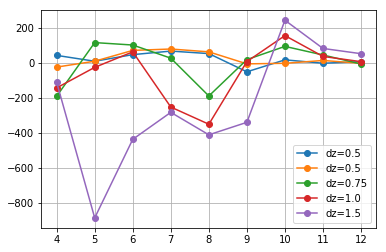

In [53]:
x = np.arange(9)+4
plt.plot(x, a[:9],'o-', label='dz=0.5')
plt.plot(x, a2[:9],'o-', label='dz=0.5')
plt.plot(x, b[:9],'o-', label='dz=0.75')
plt.plot(x, c[:9],'o-', label='dz=1.0')
plt.plot(x, d[:9],'o-', label='dz=1.5')
plt.legend()
plt.grid()

# Defocus 0.5

In [49]:
dz = 0.5

intra_name = "1579921663-HD32309_intra-0-1"
extra_name = "1579921697-HD32309_extra-0-1"

1579921663-HD32309_intra-0-1.fits
1579921697-HD32309_extra-0-1.fits
1 4
Creating stamps of centroid [y,x] = [443,476] with a side length of 150 pixels
Offset should be :20.5 [mm] at the focus, 0.5 [mm] at the hexapod
Offset in file is :20.5 [mm] at the focus
pixelSize should be: 1.44e-05


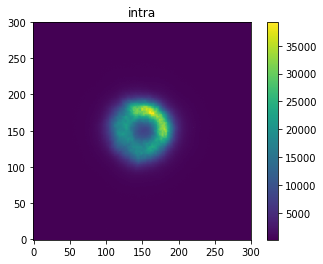

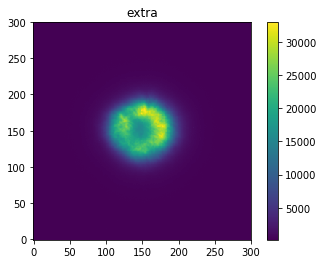

Extra-focal filename: 1579921697-HD32309_extra-0-1.fits
Intra-focal filename: 1579921663-HD32309_intra-0-1.fits
[-26.09931372   7.51513938  69.29715261  77.2199227   60.96995977
  -7.67350846  -4.41653857  11.67656204  -4.44413495   2.73507137
  -4.34069356 -15.05293112  -4.67137253 -11.66085189  -0.93312262
  -3.42565199   9.91607173   8.65657057  -1.73247076]


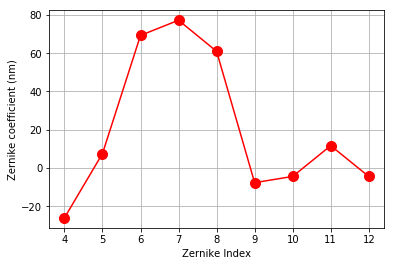

RemoteEvent(GenericCamera, 1, heartbeat) falling behind; read 77 messages


In [50]:

intra_wget_url = 'http://139.229.170.216:8000/data/'+intra_name+'.fits'
extra_wget_url = 'http://139.229.170.216:8000/data/'+extra_name+'.fits'
intra_fname = wget.download(intra_wget_url)
print(f"============")
print(f'{intra_fname}')
extra_fname = wget.download(extra_wget_url)
print(f'{extra_fname}')
print(f"============")

# Open fits files, note you can start here if your files exist already

#intra_fname='I1_intra_20190908.fits'
intra_exp=(fits.open(intra_fname))[0].data

#extra_fname='I2_extra_20190908.fits'
extra_exp=(fits.open(extra_fname))[0].data

# Show images added together to estimate centroid
plt.imshow(intra_exp+extra_exp)

# Define the image it will use to perform final center
im_shape=intra_exp.shape
side=300
# Set to False to declare centroid manually!
if True:
    im= (intra_exp+extra_exp)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
#     im_filtered[im_filtered < mean] = 0.
#     im_filtered[im_filtered > mean] = 1.
    # iter 1
    ceny, cenx = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    # iter 2
    intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
    extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]
    im= (intra_square+extra_square)
    im_filtered = medfilt(im,[5,5])
    im_filtered -= int(np.median(im_filtered))
    mean = np.mean(im_filtered)
    im_filtered[im_filtered < mean] = 0.
    im_filtered[im_filtered > mean] = 1.
    # iter 1
    cy2, cx2 = np.array(ndimage.measurements.center_of_mass(im_filtered), dtype=int)
    print(cy2-side, cx2-side)    
    ceny += (cy2-side)
    cenx += (cx2-side)
else:
    # Manually declare where the center is
    ceny=350 #round(im_shape[0]/2)
    cenx=450 # round(im_shape[1]/2)
side=150 # side length of image
print('Creating stamps of centroid [y,x] = [{},{}] with a side length of {} pixels'.format(ceny,cenx,side))
im_shape=intra_exp.shape
intra_square = intra_exp[ceny-side:ceny+side, cenx-side:cenx+side] 
extra_square = extra_exp[ceny-side:ceny+side, cenx-side:cenx+side]

#Create object for CWFS code
# Select where your object is, but ours will be on-axis
fieldXY = [0.0,0.0]

# I1/I2 get modified down below, so reset here
I1 = None; I2=None
I1 = Image(intra_square, fieldXY, Image.INTRA)
I2 = Image(extra_square, fieldXY, Image.EXTRA)

# Declare instrument
inst=Instrument('auxtel',I1.sizeinPix) # example
inst.offset = dz*0.041
hex_to_focus_scale = 41.0
offset=0.5 *hex_to_focus_scale # [mm] multiply hexapod dz by magnification factor
pixelsize = 3.6e-6*4 # 4 is the binning
# FIXME: put an assertion here and calculate binning above based on change in image size, also pull offset from filename!

print('Offset should be :{} [mm] at the focus, {} [mm] at the hexapod'.format(offset, offset/hex_to_focus_scale))
print('Offset in file is :{} [mm] at the focus'.format(1e3*inst.offset))
print('pixelSize should be: {}'.format(pixelsize))

#declare algorithm
# declare algorithm - exponential solver.
algo=Algorithm('exp',inst,1) # example - but only want 11 Zernikes (Num_of_Zernikes)


# Plot images
plots.plotImage(I1.image,'intra') 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra')
print('Extra-focal filename: {}'.format(extra_fname))
print('Intra-focal filename: {}'.format(intra_fname))

algo.runIt(inst,I1,I2,'onAxis')
print(algo.zer4UpNm)
plots.plotZer(algo.zer4UpNm[0:9],'nm')

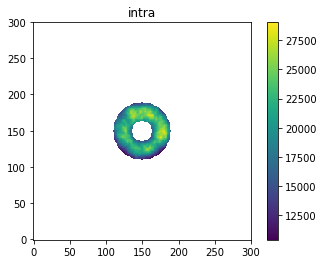

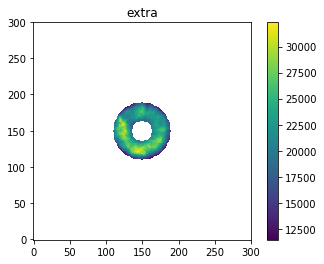

In [51]:
plots.plotImage(I1.image,'intra', mask=algo.pMask) 
#plots.plotImage(I_focus.image,'focus')
plots.plotImage(I2.image,'extra', mask=algo.pMask)